In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
import pandas_datareader.data as web

In [2]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 4)
btc = web.DataReader('BTC-USD','yahoo', start, end)

In [3]:
btc = btc[~btc.index.duplicated(keep='first')]

In [4]:
btc = btc.drop(columns=['High','Low','Open','Close','Volume'])

In [5]:
btc.columns = ['Price']

In [6]:
btc = btc.reset_index()

In [7]:
r = pd.date_range(start=btc.Date.min(), end=btc.Date.max())
btc = btc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [8]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date',inplace=True)

In [9]:
btc = btc.fillna(method='ffill')
btc = btc.fillna(method='bfill')

In [10]:
btc = btc.loc['2019-09-27':'2020-10-04']

In [11]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 4)
sc = web.DataReader('SC-USD','yahoo', start, end)

In [12]:
sc = sc.loc['2019-09-27':'2020-10-04']

In [13]:
sc = sc[~sc.index.duplicated(keep='first')]

In [14]:
sc = sc.drop(columns=['High','Low','Open','Close','Volume'])

In [15]:
sc.columns = ['Price']

In [16]:
sc = sc.reset_index()

In [17]:
r = pd.date_range(start=sc.Date.min(), end=sc.Date.max())
sc = sc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [18]:
sc['Date'] = pd.to_datetime(sc['Date'])
sc.set_index('Date',inplace=True)

In [19]:
sc = sc.fillna(method='ffill')
sc = sc.fillna(method='bfill')

In [20]:
frames = [btc,sc]

In [21]:
btc_sc = pd.concat(frames,sort=False,axis=1)

In [22]:
btc_sc.columns = ['BTC','SC']

In [23]:
x = btc_sc.iloc[:,:-1].values
y = btc_sc.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regressor.predict(x_test)

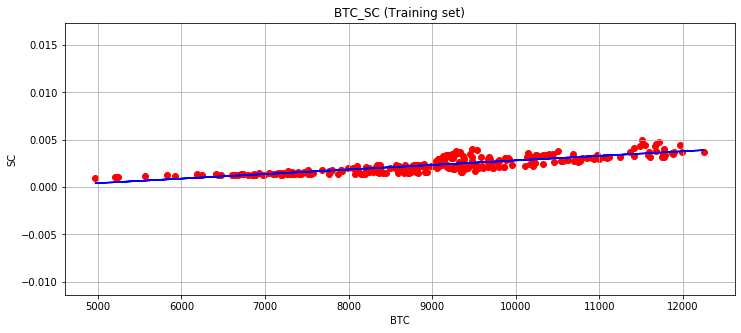

In [27]:
plt.figure(figsize=(12,5))
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('BTC_SC (Training set)')
plt.xlabel('BTC')
plt.ylabel('SC')
plt.grid()
plt.show()

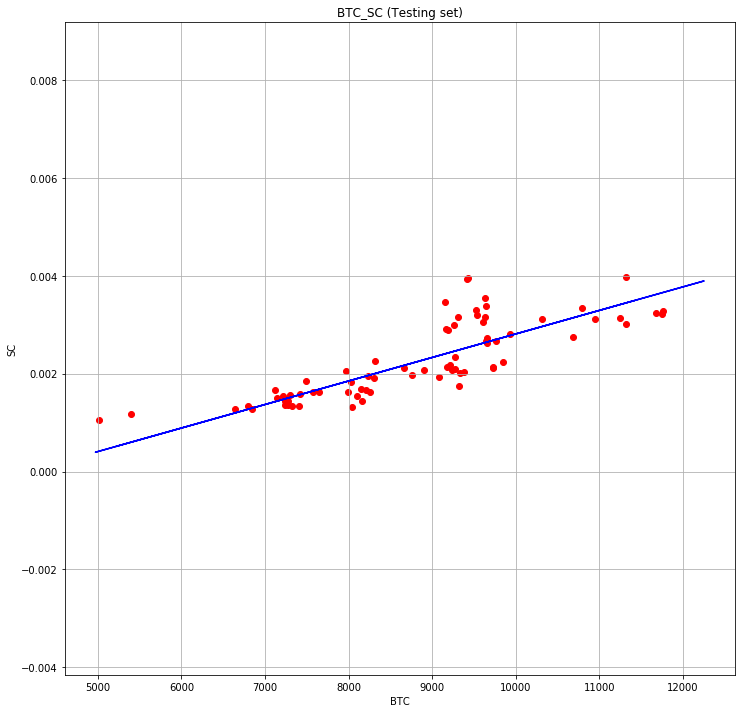

In [28]:
plt.figure(figsize=(12,12))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('BTC_SC (Testing set)')
plt.xlabel('BTC')
plt.ylabel('SC')
plt.grid()
plt.show()